In [149]:
import geopandas as gpd
gpd = gpd.read_file("export1.geojson")

In [150]:
gpd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        961 non-null    object  
 1   @id                       961 non-null    object  
 2   addr:city                 25 non-null     object  
 3   addr:full                 2 non-null      object  
 4   addr:housenumber          1 non-null      object  
 5   addr:place                2 non-null      object  
 6   addr:postcode             27 non-null     object  
 7   addr:street               2 non-null      object  
 8   addr:suburb               2 non-null      object  
 9   amenity                   31 non-null     object  
 10  area                      6 non-null      object  
 11  bridge                    3 non-null      object  
 12  building                  1 non-null      object  
 13  cables                    2 non-null      

In [151]:
gdf['name'].value_counts()

Youssoufia                                             3
Route Nationale 11                                     1
Pharmacie Al Qods صيدلية القدس                         1
Pharmacie Lahdir صيدلية لهضير                          1
Pharmacie Zainab صيدلية زينب                           1
Pharmacie Chefchaouni صيدلية الشفشاوني                 1
Pharmacie Najmi صيدلية نجمي                            1
Pharmacie Zaytouna صيدلية زيتونة                       1
Pharmacie Moatamid Ibn Abbad صيدلية المعتمد بن عباد    1
Pharmacie Dokkali صيدلية دكالي                         1
Pharmacie Orphelinat صيدلية الخيرية                    1
Pharmacie Kachkat صيدلية كاشكاط                        1
Pharmacie Zaid صيدلية زيد                              1
Pharmacie Louis Gentil صيدلية لويس جونتي               1
Pharmacie Minicipalité صيدلية البلدية                  1
Pharmacie Ahmar صيدلية أحمر                            1
Pharmacie Inas صيدلية ايناس                            1
Safi - Ben Guerir أسفي - ابن جر

In [124]:
gdf['amenity'].value_counts()

pharmacy            23
post_office          2
fuel                 2
parking              1
bus_station          1
place_of_worship     1
taxi                 1
Name: amenity, dtype: int64

In [135]:
gdf['geometry'].value_counts()

LINESTRING (-8.52653 32.26371, -8.52631 32.263...    2
MULTILINESTRING ((-8.52653 32.26371, -8.52631 ...    1
POLYGON ((-8.52369 32.25296, -8.52429 32.25286...    1
POLYGON ((-8.53592 32.23839, -8.53553 32.23715...    1
MULTILINESTRING ((-8.52210 32.25125, -8.52203 ...    1
                                                    ..
POINT (-8.53795 32.23999)                            1
POINT (-8.53560 32.23602)                            1
POINT (-8.52399 32.25216)                            1
POINT (-8.52330 32.25198)                            1
POINT (-8.52044 32.25193)                            1
Name: geometry, Length: 960, dtype: int64

C:\Users\Youcode\AppData\Local\Temp\ipykernel_6612\185296669.py:24: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler



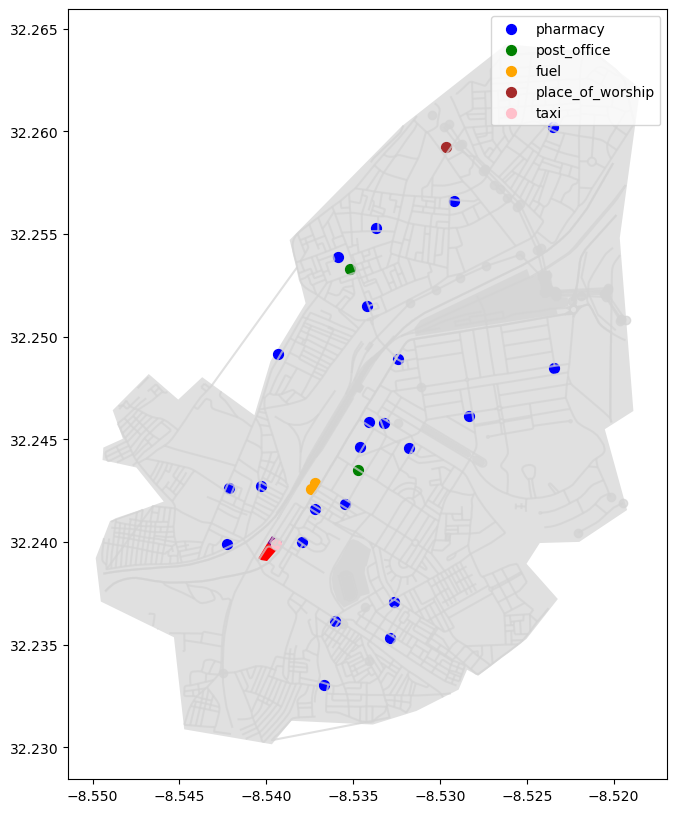

In [152]:
import matplotlib.pyplot as plt

poi_categories = ['pharmacy', 'post_office', 'fuel', 'parking', 'bus_station', 'place_of_worship', 'taxi']
selected_poi_gdf = gdf[gdf['amenity'].isin(poi_categories)]

category_colors = {
    'pharmacy': 'blue',
    'post_office': 'green',
    'fuel': 'orange',
    'parking': 'purple',
    'bus_station': 'red',
    'place_of_worship': 'brown',
    'taxi': 'pink'
}

fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(ax=ax, color='lightgray', alpha=0.7)

for category, color in category_colors.items():
    category_gdf = selected_poi_gdf[selected_poi_gdf['amenity'] == category]
    category_gdf.plot(ax=ax, color=color, markersize=50, label=category)

ax.legend()

plt.show()
